In [685]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [686]:
# Import csv
cars = pd.read_csv("/Users/max/Library/Mobile Documents/com~apple~CloudDocs/Coding Files/KNearestNeighborPredictor/Used Cars Price Data.csv")
# Remove collumn limits
pd.set_option('display.max_columns',100)
# Inspect data
print(cars.columns)

# Delete first row because useless
del cars['Unnamed: 0']

# Columns to convert to strings
columns_to_convert = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'New_Price']

# Convert specified columns to strings
cars[columns_to_convert] = cars[columns_to_convert].astype(str)

# Display the first 10 rows
display(cars.head(10))

# Print the DataFrame info
print(cars.info())

print(cars['Owner_Type'].describe())

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price'],
      dtype='object')


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,nan
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,nan
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,nan
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,nan
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0,nan
6,Toyota Fortuner 4x2 AT TRD Sportivo,Pune,2015,59000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.7 bhp,7.0,nan
7,Hyundai EON Era Plus,Jaipur,2013,65000,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,nan
8,Honda City 1.5 S MT,Mumbai,2011,66000,Petrol,Manual,Second,17.0 kmpl,1497 CC,118 bhp,5.0,nan
9,Mahindra XUV500 W6 2WD,Coimbatore,2015,54684,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,nan


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1234 non-null   object 
 9   Power              1234 non-null   object 
 10  Seats              1223 non-null   float64
 11  New_Price          1234 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB
None
count      1234
unique        4
top       First
freq       1023
Name: Owner_Type, dtype: object


In [687]:
# Mask to find out null
mask = cars['Engine'].isnull()
display(cars[mask])

# Delete null values in Engine column
cars.dropna(subset=['Engine', 'Seats'], inplace=True)

# Extract mileage and convert to float
cars['Mileage'] = cars['Mileage'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

# Extract New_Price and convert to float
cars['New_Price'] = cars['New_Price'].str.extract(r'(\d+\.\d+|\d+)').astype(float) * 100000 * 0.011

# Extract engine and convert to float
cars['Engine'] = cars['Engine'].str.extract(r'(\d+)').astype(int)

# Extract power and convert to float and drop nul values
cars['Power'] = cars['Power'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
cars.dropna(subset='Power', inplace=True)

# Filtering transmission (True if automatic, False if manual)
cars['is_Automatic'] = (cars['Transmission'] == 'Automatic').astype(int)

# Filtering transmission (True if automatic, False if manual)
cars['is_Automatic'] = (cars['Transmission'] == 'Automatic').astype(int)

# Factorize 'Fuel_Type' and assign integer values from 0 to 3
cars['FFuel_Type'], _ = pd.factorize(cars['Fuel_Type'])

# Factorize 'Owner_Type' and assign integer values from 0 to 3
cars['FOwner_Type'], _ = pd.factorize(cars['Owner_Type'])

print(cars.isnull().sum())
display(cars.head(10))

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price


Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            1019
is_Automatic            0
FFuel_Type              0
FOwner_Type             0
dtype: int64


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,is_Automatic,FFuel_Type,FOwner_Type
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.20,4.0,NaN,0,0,0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796,47.30,5.0,NaN,0,1,1
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.80,7.0,27797.0,0,2,0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197,82.85,5.0,NaN,0,1,0
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179,140.00,7.0,NaN,0,2,1
6,Toyota Fortuner 4x2 AT TRD Sportivo,Pune,2015,59000,Diesel,Automatic,First,12.55,2982,168.70,7.0,NaN,1,2,0
7,Hyundai EON Era Plus,Jaipur,2013,65000,Petrol,Manual,First,21.10,814,55.20,5.0,NaN,0,1,0
8,Honda City 1.5 S MT,Mumbai,2011,66000,Petrol,Manual,Second,17.00,1497,118.00,5.0,NaN,0,1,1
9,Mahindra XUV500 W6 2WD,Coimbatore,2015,54684,Diesel,Manual,First,15.10,2179,140.00,7.0,NaN,0,2,0
10,Audi Q5 2008-2012 2.0 TDI,Mumbai,2012,78000,Diesel,Automatic,Second,12.80,1968,167.60,5.0,NaN,1,2,1


In [688]:
# Create new df where new_price is not null
cars_price = cars[cars['New_Price'].notnull()]

# Assign values from new df into data and labels
car_data = cars_price[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'is_Automatic', 'FFuel_Type', 'FOwner_Type']]
car_labels = cars_price['New_Price']

# Create training/validation sets
training_data, validation_data, training_labels, validation_labels = train_test_split(car_data, car_labels, test_size = 0.2, random_state=100)

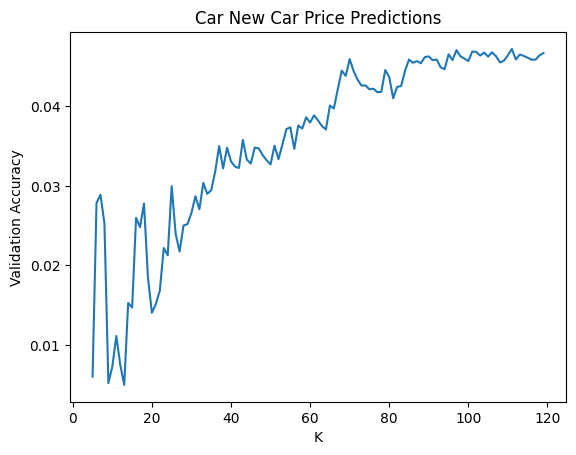

In [689]:
accuracies = []
for k in range(5,120):
    # Creating Regressor
    regr = KNeighborsRegressor(n_neighbors=k, weights='distance')

    # Fitting Regressor
    regr.fit(training_data, training_labels)

    # Find score
    score = regr.score(validation_data, validation_labels)
    accuracies.append(score)

plt.plot(range(5,120), accuracies)
plt.xlabel('K')
plt.ylabel('Validation Accuracy')
plt.title('Car New Car Price Predictions')
plt.show()


In [690]:
# New DF to test data
cars_no_price = cars.copy()  # Ensure you're working with a copy of the DataFrame
cars_no_price = cars_no_price.drop(['Name', 'New_Price', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], axis=1)  # Drop columns

# Creating Regressor
regr = KNeighborsRegressor(n_neighbors=50, weights='distance')

# Fitting Regressor
regr.fit(training_data, training_labels)

# Prediction
prediction = regr.predict(cars_no_price)

# Attach prediction to df
cars_no_price['New_Price'] = prediction

display(cars_no_price.head(10))


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,is_Automatic,FFuel_Type,FOwner_Type,New_Price
0,2014,40929,32.26,998,58.20,4.0,0,0,0,11712.298406
1,2013,54493,24.70,796,47.30,5.0,0,1,1,20953.878401
2,2017,34000,13.68,2393,147.80,7.0,0,2,0,27797.000000
4,2014,29000,18.50,1197,82.85,5.0,0,1,0,15360.654150
5,2016,85609,16.00,2179,140.00,7.0,0,2,1,22329.708836
6,2015,59000,12.55,2982,168.70,7.0,1,2,0,27096.944064
7,2013,65000,21.10,814,55.20,5.0,0,1,0,17702.768923
8,2011,66000,17.00,1497,118.00,5.0,0,1,1,20644.899232
9,2015,54684,15.10,2179,140.00,7.0,0,2,0,26838.889384
10,2012,78000,12.80,1968,167.60,5.0,1,2,1,22617.386766
